In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
import matplotlib.ticker as ticker
import geopandas
from shapely.geometry import shape
from PIL import Image
import glob
from IPython.display import HTML

# Load data from nytimes
# Has data for each county in each state
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', 
                 parse_dates=['date'])


# https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

@np.vectorize
def state_abbrev(state):
    return us_state_abbrev[state]


In [2]:
# Print the data
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
# Select South Carolina
state = df.copy(deep=True)
state["name"] = state.county + " ," + state_abbrev(state.state)
# Group by county for each date
state = state.pivot(index='date', columns='name', values='cases')
state = state.fillna(0.0)
state.tail(5)

name,"Abbeville ,SC","Acadia ,LA","Accomack ,VA","Ada ,ID","Adair ,IA","Adair ,KY","Adair ,MO","Adair ,OK","Adams ,CO","Adams ,IA",...,"York ,SC","York ,VA","Young ,TX","Yuba ,CA","Yukon-Koyukuk Census Area ,AK","Yuma ,AZ","Yuma ,CO","Zapata ,TX","Zavala ,TX","Ziebach ,SD"
date,,,,,,,,,,,,,,,,,,,,,
2020-07-18,185.0,1610.0,1051.0,5723.0,20.0,174.0,114.0,168.0,5058.0,12.0,...,2232.0,200.0,71.0,257.0,19.0,9094.0,55.0,113.0,121.0,3.0
2020-07-19,190.0,1696.0,1052.0,5900.0,20.0,176.0,114.0,170.0,5094.0,12.0,...,2390.0,216.0,71.0,270.0,29.0,9301.0,56.0,113.0,121.0,3.0
2020-07-20,242.0,1844.0,1053.0,5999.0,20.0,179.0,115.0,172.0,5133.0,12.0,...,2438.0,226.0,71.0,289.0,29.0,9378.0,56.0,113.0,131.0,3.0
2020-07-21,246.0,1920.0,1057.0,6195.0,20.0,180.0,116.0,196.0,5184.0,12.0,...,2514.0,234.0,73.0,309.0,29.0,9672.0,56.0,115.0,131.0,3.0
2020-07-22,249.0,2011.0,1057.0,6423.0,21.0,184.0,117.0,205.0,5248.0,12.0,...,2571.0,237.0,81.0,319.0,32.0,9718.0,56.0,115.0,131.0,3.0


In [ ]:
#plot = state.plot(figsize=(12,8), linewidth=5, cmap='PuBu')
#plot.legend(ncol=2, bbox_to_anchor=(1, 1), loc='upper left')
#plt.show()

In [4]:
# Copy data
new_per_day = state.copy(deep=True)

# Get difference per day instead of total cases
for county in state.columns:
    new_per_day[county] = new_per_day[county].sum()
new_per_day = new_per_day.fillna(0.0)
new_per_day.tail(5) 


name,"Abbeville ,SC","Acadia ,LA","Accomack ,VA","Ada ,ID","Adair ,IA","Adair ,KY","Adair ,MO","Adair ,OK","Adams ,CO","Adams ,IA",...,"York ,SC","York ,VA","Young ,TX","Yuba ,CA","Yukon-Koyukuk Census Area ,AK","Yuma ,AZ","Yuma ,CO","Zapata ,TX","Zavala ,TX","Ziebach ,SD"
date,,,,,,,,,,,,,,,,,,,,,
2020-07-18,7252.0,58387.0,74069.0,168022.0,920.0,10521.0,5852.0,9652.0,319719.0,488.0,...,75952.0,9413.0,1784.0,6792.0,384.0,301057.0,3184.0,2875.0,2463.0,135.0
2020-07-19,7252.0,58387.0,74069.0,168022.0,920.0,10521.0,5852.0,9652.0,319719.0,488.0,...,75952.0,9413.0,1784.0,6792.0,384.0,301057.0,3184.0,2875.0,2463.0,135.0
2020-07-20,7252.0,58387.0,74069.0,168022.0,920.0,10521.0,5852.0,9652.0,319719.0,488.0,...,75952.0,9413.0,1784.0,6792.0,384.0,301057.0,3184.0,2875.0,2463.0,135.0
2020-07-21,7252.0,58387.0,74069.0,168022.0,920.0,10521.0,5852.0,9652.0,319719.0,488.0,...,75952.0,9413.0,1784.0,6792.0,384.0,301057.0,3184.0,2875.0,2463.0,135.0
2020-07-22,7252.0,58387.0,74069.0,168022.0,920.0,10521.0,5852.0,9652.0,319719.0,488.0,...,75952.0,9413.0,1784.0,6792.0,384.0,301057.0,3184.0,2875.0,2463.0,135.0


In [5]:
# Get geometry data
# https://github.com/deldersveld/topojson
geodata = geopandas.read_file(f"https://github.com/deldersveld/topojson/blob/master/countries/united-states/us-albers-counties.json?raw=true")

geodata

,id,fips,state_fips,county_fips,name,lsad,census_area,state,iso_3166_2,geometry
0,0,01001,01,001,Autauga,County,594.436,Alabama,AL,"POLYGON ((-86.49415 32.34372, -86.71953 32.404..."
1,1,01009,01,009,Blount,County,644.776,Alabama,AL,"POLYGON ((-86.57506 33.76425, -86.75998 33.841..."
2,2,01017,01,017,Chambers,County,596.531,Alabama,AL,"POLYGON ((-85.18234 32.86995, -85.12455 32.772..."
3,3,01021,01,021,Chilton,County,692.854,Alabama,AL,"POLYGON ((-86.51727 33.01948, -86.51727 32.930..."
4,4,01033,01,033,Colbert,County,592.619,Alabama,AL,"POLYGON ((-88.14114 34.58091, -88.14114 34.586..."
...,...,...,...,...,...,...,...,...,...,...
3138,3138,15009,15,009,Maui,County,1161.521,Hawaii,HI,"MULTIPOLYGON (((-103.70951 26.42579, -103.6286..."
3139,3139,15001,15,001,Hawaii,County,4028.417,Hawaii,HI,"POLYGON ((-102.27057 25.41646, -102.26479 25.4..."
3140,3140,15007,15,007,Kauai,County,619.956,Hawaii,HI,"MULTIPOLYGON (((-107.42535 27.08142, -107.4195..."
3141,3141,15005,15,005,Kalawao,County,11.991,Hawaii,HI,"POLYGON ((-103.70951 26.42579, -103.69218 26.4..."


In [6]:
geodata['full_name'] = geodata.name + " ," + state_abbrev(geodata.state)

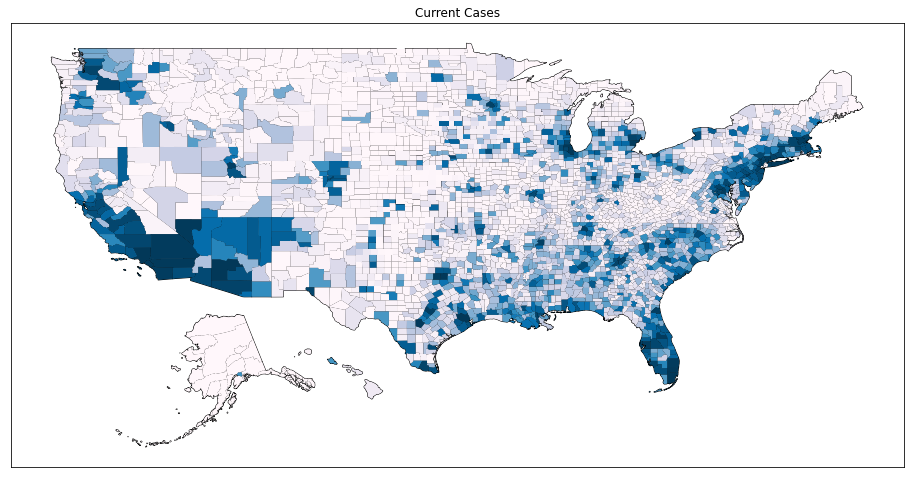

In [8]:
fig, ax = plt.subplots(figsize=(16,16))
geodata.plot(color="white", edgecolor='black', ax=ax)
max_count = np.max(state.max(axis=0))

geodata["color"] = np.zeros_like(geodata.full_name)

for c in state.iteritems():
    geodata.loc[geodata.full_name == c[0], 'color'] = c[1][-1]

geodata.plot(column='color', ax=ax, cmap='PuBu')
ax.set_title(f"Current Cases")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.show()
#plt.close()